#### [남북한 발전 전력량 분석 및 시각화]
- DataSet : 남북한 발전 전력량.xlsx
- 데이터 구성 
   * 1990년 ~ 2016년까지 수력, 화력, 원자력, 신재생 E Data
- 분석 주제 : 남한과 북한의 E Data 변화 분석

In [12]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# [2] Data 준비
FILE_DATA = r"C:\Hwan\Pandas_ex\DAY07\남북한발전전력량.xlsx"

In [14]:
# [3] EXCEL => DataFrame 형태로 저장
dataDF = pd.read_excel(FILE_DATA)

In [15]:
# [4] Data 확인
dataDF.info()
print(dataDF.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [16]:
# [5] 데이터 전처리 및 가공
# - 멀티인덱싱 : 2개의 칼럼을 행 인덱스로 설정 
# 1) NaN(결측치) 칼럼에 대한 처리
# 2) 2개의 칼럼을 행 인덱스로 설정

In [17]:
# 1) NaN(결측치) 칼럼에 대한 처리
dataDF.columns

Index(['전력량 (억㎾h)',    '발전 전력별',        1990,        1991,        1992,
              1993,        1994,        1995,        1996,        1997,
              1998,        1999,        2000,        2001,        2002,
              2003,        2004,        2005,        2006,        2007,
              2008,        2009,        2010,        2011,        2012,
              2013,        2014,        2015,        2016],
      dtype='object')

In [18]:
dataDF[dataDF.columns[0]]   # dataDF.columns[0] == dataDF["전력량 (억㎾h)"]

0     남한
1    NaN
2    NaN
3    NaN
4    NaN
5     북한
6    NaN
7    NaN
8    NaN
Name: 전력량 (억㎾h), dtype: object

In [19]:
# nan 값 채우기
# dataDF[dataDF.columns[0]].fillna(method = "ffill") 이것도 맞으나 미래에 오류 발생 가능성 높다고 알림 떠서 밑에 권장 
dataDF[dataDF.columns[0]].ffill(inplace = True)

In [20]:
dataDF.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [21]:
DATA = dataDF.set_index(["전력량 (억㎾h)", "발전 전력별"])
DATA

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     -     -     -     -     -     -     -     -     -   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        -  

[9 rows x 27 columns]

In [22]:
# plt.plot(DATA.loc[("남한", "합계")], "ro-", label = "Sum")
# plt.plot(DATA.loc[("남한", "수력")], "r-", label = "Water")
# plt.plot(DATA.loc[("남한", "화력")], "r-", label = "Fire")
# plt.plot(DATA.loc[("남한", "원자력")], "r-", label = "Ne")
# plt.plot(DATA.loc[("남한", "신재생")], "r-", label = "Eco")

# plt.plot(DATA.loc[("북한", "합계")], "bo-", label = "Sum")
# plt.plot(DATA.loc[("북한", "수력")], "b-", label = "Water")
# plt.plot(DATA.loc[("북한", "화력")], "b-", label = "Fire")
# plt.plot(DATA.loc[("북한", "원자력")], "b-", label = "Ne")

# plt.title('[S/N KOREA]')
# plt.xlabel("YEAR")
# plt.ylabel("DATA")
# plt.legend() 
# plt.show()

In [23]:
# plt.plot(DATA.loc[("북한", "합계")], "bo-", label = "Sum")
# plt.plot(DATA.loc[("북한", "수력")], "b-", label = "Water")
# plt.plot(DATA.loc[("북한", "화력")], "b-", label = "Fire")
# plt.plot(DATA.loc[("북한", "원자력")], "b-", label = "Ne")

# plt.title('[S/N KOREA]')
# plt.xlabel("YEAR")
# plt.ylabel("DATA")
# plt.legend() 
# plt.show()

In [24]:
# 강사님이랑 
# 행 인덱스 사용할 컬럼명 추출
dataDF.columns[:2].to_list()

['전력량 (억㎾h)', '발전 전력별']

In [25]:
# 2개의 칼럼을 행인덱스로 설정
dataDF.set_index(dataDF.columns[:2].to_list(), inplace = True)
print(f"[확인]\n{dataDF.head(2)}")
dataDF

[확인]
                  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  

[2 rows x 27 columns]


1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     -     -     -     -     -     -     -     -     -   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        -  

[9 rows x 27 columns]

In [26]:
# 행 인덱스 names 속성 수정
idx_names = dataDF.index.names
print(f"idx_names : {idx_names}")

dataDF.index.set_names({idx_names[0] : "구분", idx_names[1]:"전력"}, inplace = True)
print(f"[확인]\n {dataDF.head()}")

idx_names : ['전력량 (억㎾h)', '발전 전력별']
[확인]
         1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생     -     -     -     -     -     -     -     -     -     -  ...     -   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생     -

In [27]:
# 데이터 전처리 및 가공
# "-" 데이터 값 <NA>로 치환 후 0으로 치환 // numpy에 nan이랑 다른 값으로 인식함 둘 중에 하나로 통일 해줘야함
dataDF.replace("-", pd.NA, inplace = True)
print(f"[확인]\n{dataDF.head()}")

[확인]
        1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생  <NA>  <NA>  <NA>  <NA>    86   118   151 

In [28]:
# NA 데이터 값 0으로 치환
dataDF.isna().T.sum()

구분  전력 
남한  합계      0
    수력      0
    화력      0
    원자력     0
    신재생    22
북한  합계      0
    수력      0
    화력      0
    원자력    27
dtype: int64

In [29]:
dataDF.fillna(0, inplace=True)
dataDF.isna().T.sum()

C:\Users\hwans\AppData\Local\Temp\ipykernel_26964\3506823266.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF.fillna(0, inplace=True)


구분  전력 
남한  합계     0
    수력     0
    화력     0
    원자력    0
    신재생    0
북한  합계     0
    수력     0
    화력     0
    원자력    0
dtype: int64

In [30]:
# object 타입 => int 16으로 형 변환
dataDF = dataDF.astype("int16")
dataDF.dtypes

1990    int16
1991    int16
1992    int16
1993    int16
1994    int16
1995    int16
1996    int16
1997    int16
1998    int16
1999    int16
2000    int16
2001    int16
2002    int16
2003    int16
2004    int16
2005    int16
2006    int16
2007    int16
2008    int16
2009    int16
2010    int16
2011    int16
2012    int16
2013    int16
2014    int16
2015    int16
2016    int16
dtype: object

c:\Users\hwans\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hwans\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hwans\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hwans\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hwans\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.pri

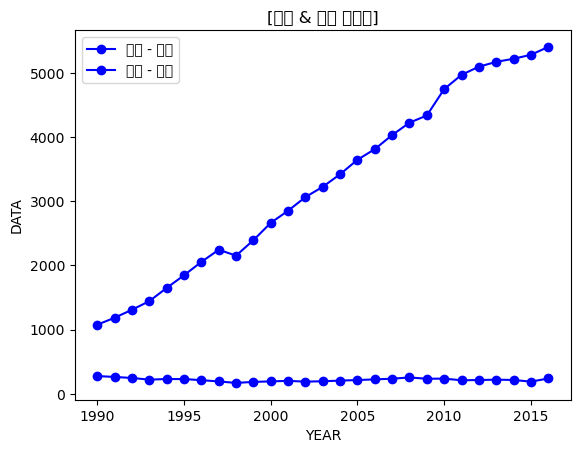

In [31]:
# [6] 남한과 북한 발전량 합계 비교
plt.plot(dataDF.loc[("남한", "합계")], "bo-", label = "남한 - 합계")
plt.plot(dataDF.loc[("북한", "합계")], "bo-", label = "북한 - 합계")

plt.title('[남한 & 북한 발전량]')
plt.xlabel("YEAR")
plt.ylabel("DATA")
plt.legend() 
plt.show()

In [32]:
# 한글 폰트 설정 => 폰트 매니저 모듈 사용
from matplotlib import font_manager as fm, rc

# 적용할 폰트 파일
FONT_FILE = r"C:\Windows\Fonts\batang.ttc"

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname = FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family = font_name)

In [33]:
# 폰트 불러오는 함수 
def set_customFont(font_path) :
    from matplotlib import font_manager as fm, rc
    # 폰트 패밀리 이름 가져오기
    font_name = fm.FontProperties(fname = FONT_FILE).get_name()

    # 새로운 폰트 패밀리 이름 지정
    rc('font', family = font_name)

# 적용법
set_customFont(r"C:\Windows\Fonts\batang.ttc")

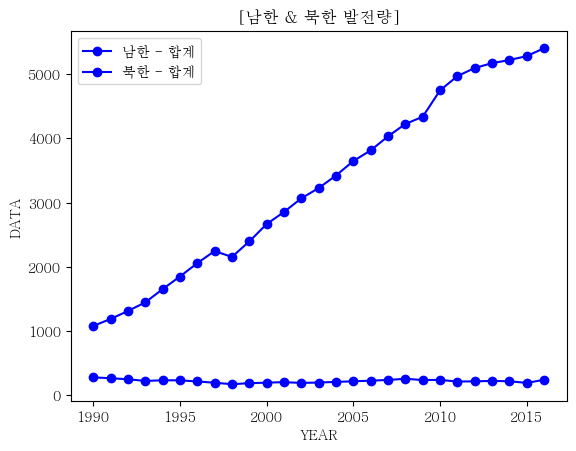

In [34]:
plt.plot(dataDF.loc[("남한", "합계")], "bo-", label = "남한 - 합계")
plt.plot(dataDF.loc[("북한", "합계")], "bo-", label = "북한 - 합계")

plt.title('[남한 & 북한 발전량]')
plt.xlabel("YEAR")
plt.ylabel("DATA")
plt.legend() 
plt.show()

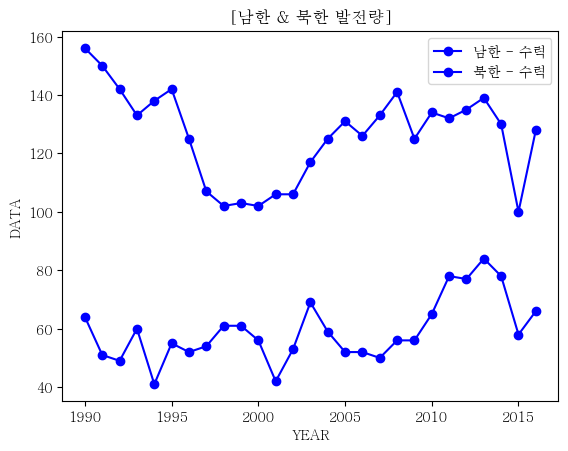

In [35]:
plt.plot(dataDF.loc[("남한", "수력")], "bo-", label = "남한 - 수력")
plt.plot(dataDF.loc[("북한", "수력")], "bo-", label = "북한 - 수력")

plt.title('[남한 & 북한 발전량]')
plt.xlabel("YEAR")
plt.ylabel("DATA")
plt.legend() 
plt.show()

In [36]:
def drawLineGraph(title, columns, labels, xlabel, ylabel) :
    for col in columns :
        plt.plot(dataDF.loc[col], 'ro-', label =f'{col}')
    for idx, col in enumerate(columns) :
        plt.plot(dataDF.loc[col], 'bo-', label =f'{labels[idx]}')
    plt.title(f'---[{title}---]')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend() 
    plt.show()

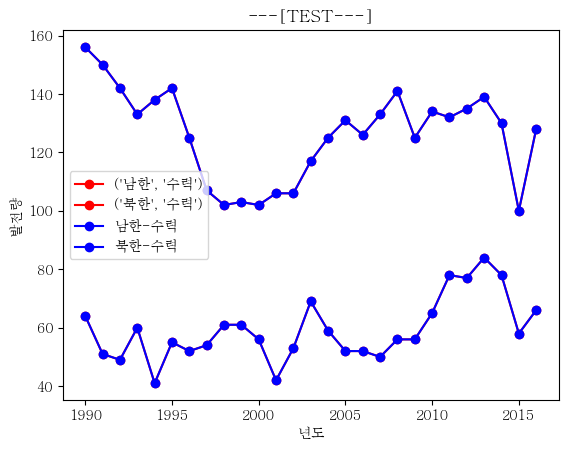

In [37]:
drawLineGraph("TEST", [("남한", "수력"), ("북한", "수력")], ["남한-수력", "북한-수력"], "년도", "발전량")